**********Processing Scanned Image**********
Total Number of Features matches found are 178 and form identified as Form 131

**********Processing Alignment code**********


<Figure size 1440x720 with 0 Axes>

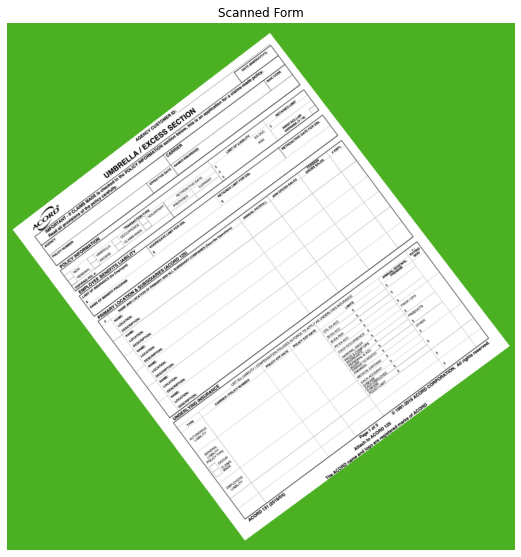

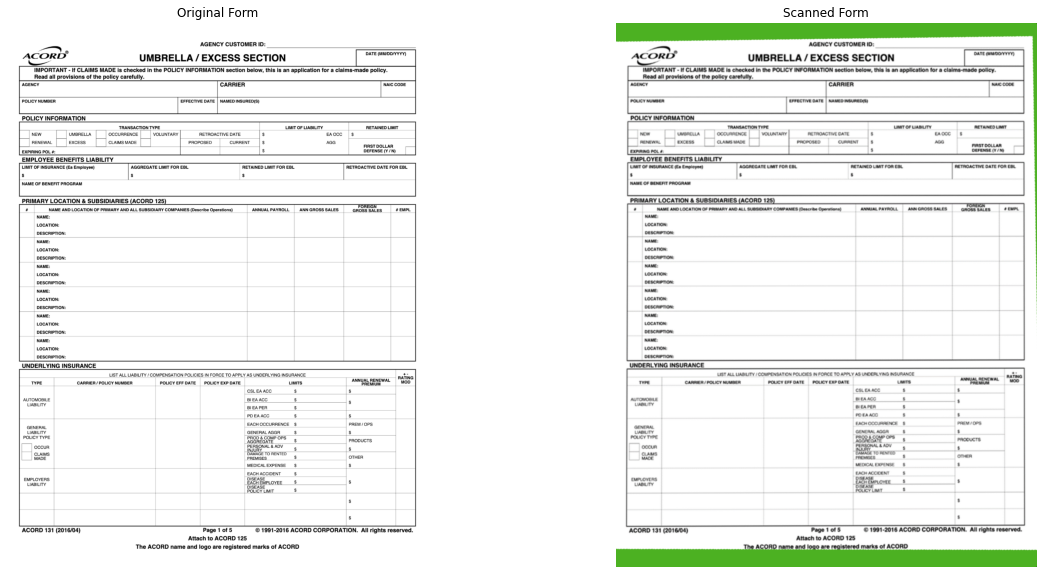

In [2]:
# importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


# function to read the images by taking their path
def read_image(path1,path2,path3,path4):
    read_img1 = cv2.imread(path1)
    read_img2 = cv2.imread(path2)
    read_img3 = cv2.imread(path3)
    read_img4 = cv2.imread(path4)
        
    return (read_img1,read_img2,read_img3,read_img4)

# function to convert images from RGB to gray scale
def convert_to_grayscale(pic1,pic2,pic3,pic4):
        gray_img1 = cv2.cvtColor(pic1,cv2.COLOR_BGR2GRAY)
        gray_img2 = cv2.cvtColor(pic2,cv2.COLOR_BGR2GRAY)
        gray_img3 = cv2.cvtColor(pic3,cv2.COLOR_BGR2GRAY)
        gray_img4 = cv2.cvtColor(pic4,cv2.COLOR_BGR2GRAY)
        
        return (gray_img1,gray_img2,gray_img3,gray_img4)

# function to detect the features by finding key points and descriptors from the image
def detector(image1,image2,image3,image4):
        # creating ORB detector
        MAX_NUM_FEATURES = 500
        detect = cv2.ORB_create(MAX_NUM_FEATURES)

        # finding key points and descriptors of images using
        # detectAndCompute() function
        key_point1,descrip1 = detect.detectAndCompute(image1,None)
        key_point2,descrip2 = detect.detectAndCompute(image2,None)
        key_point3,descrip3 = detect.detectAndCompute(image3,None)
        key_point4,descrip4 = detect.detectAndCompute(image4,None)
    
        return (key_point1,descrip1,key_point2,descrip2,key_point3,descrip3,key_point4,descrip4)

# function to find best detected features using brute force
# matcher and match them according to there humming distance
def BF_FeatureMatcher(des1,des2,des3,des4):
        brute_force = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
        no_of_matches1 = brute_force.match(des2,des1,None)

        # finding the humming distance of the matches and sorting them
        no_of_matches1 = sorted(no_of_matches1,key=lambda x:x.distance)

        no_of_matches2 = brute_force.match(des3,des1)

        # finding the humming distance of the matches and sorting them
        no_of_matches2 = sorted(no_of_matches2,key=lambda x:x.distance)

        no_of_matches3 = brute_force.match(des4,des1)

        # finding the hamming distance of the matches and sorting them
        no_of_matches3 = sorted(no_of_matches3,key=lambda x:x.distance)
        
        return (no_of_matches1,no_of_matches2,no_of_matches3)

def Align(matches,im2,im1,descriptors1,descriptors2,keypoints1,keypoints2):
        
        matcher=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
        matches=matcher.match(descriptors1, descriptors2,None)
        matches=list(matches)
        # Sort matches by score
        matches.sort(key=lambda x: x.distance, reverse=False)
        
        points1 = np.zeros((len(matches),2),dtype=np.float32)
        points2 = np.zeros((len(matches),2),dtype=np.float32)

        for i, match in enumerate(matches):
            points1 [i,:] = keypoints1[match.queryIdx].pt
            points2 [i,:] = keypoints2[match.trainIdx].pt
        
        #Find homography
        h,mask = cv2.findHomography(points2, points1,cv2.RANSAC)

        # Use homography to warp image

        height, width, channels = im1.shape
        im2_reg = cv2.warpPerspective(im2, h, (width, height) )

        # Display results

        plt.figure(figsize=[20,10]);

        plt.subplot(121); plt.imshow(im1); plt.axis('off' ); plt.title ( "Original Form" ) ;
        plt.subplot(122) ; plt.imshow(im2_reg); plt.axis('off' ); plt.title( "Scanned Form");
        return(im2_reg)

# main function
if __name__ == '__main__':
        # giving the path of all the images
        first_image_path = 'sample.png'
        second_image_path = 'Acord_126_Form.png'
        third_image_path = 'Acord_131_Form.png'
        fourth_image_path = 'Acord_140_Form.png'

        plt.figure(figsize=[20,10]);

        # reading the image from there paths
        img1, img2, img3, img4 = read_image(first_image_path,second_image_path,third_image_path,fourth_image_path)
        #display image
        print(f'**********Processing Scanned Image**********')
        plt.figure(figsize=[20,10]);
        plt.subplot(121); plt.axis('off'); plt.imshow(img1); plt.title("Scanned Form")

        
        
        # converting the read images into the gray scale images
        gray_pic1, gray_pic2, gray_pic3, gray_pic4 = convert_to_grayscale(img1,img2,img3,img4)

        # storing the finded key points and descriptors of both of the images
        key_pt1,descrip1,key_pt2,descrip2,key_pt3,descrip3,key_pt4,descrip4 = detector(gray_pic1,gray_pic2,gray_pic3,gray_pic4)

        # sorting the number of best matches obtained from brute force matcher
        number_of_matches1,number_of_matches2,number_of_matches3 = BF_FeatureMatcher(descrip1,descrip2,descrip3,descrip4)
        
        #Calculating No. of matches
        tot_feature_matches1 = len(number_of_matches1)
        tot_feature_matches2 = len(number_of_matches2)
        tot_feature_matches3 = len(number_of_matches3)

        #Form with max matches
        Form_match=max(tot_feature_matches1,tot_feature_matches2,tot_feature_matches3)
        if(Form_match==tot_feature_matches1):
            Form='Form 126'
            print(f'Total Number of Features matches found are {Form_match} and form identified as',Form)
            print("\n**********Processing Alignment code**********")
            img=Align(number_of_matches1,img1,img2,descrip2,descrip1,key_pt2,key_pt1)    

        
        elif(Form_match==tot_feature_matches2):
            Form='Form 131'
            print(f'Total Number of Features matches found are {Form_match} and form identified as',Form)
            print("\n**********Processing Alignment code**********")
            img=Align(number_of_matches2,img1,img3,descrip3,descrip1,key_pt3,key_pt1)

        
        else :
            Form='Form 140'
            print(f'Total Number of Features matches found are {Form_match} and form identified as',Form)
            print("\n**********Processing Alignment code**********")
            img=Align(number_of_matches3,img1,img4,descrip4,descrip1,key_pt4,key_pt1)
            

In [18]:
print(tot_feature_matches1,tot_feature_matches2,tot_feature_matches3)

161 130 134


In [24]:
from PIL import Image
img1=Image.fromarray(img,'RGB')
img1.save('my.png')

In [26]:
image = cv2.imread('my.png')
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

## type(img)
path=r'IMG9.jpg'
im = Image.open(path)
type(im)

In [29]:
import xml.etree.ElementTree as ET
import pytesseract 
from PIL import Image
import json

mytree=ET.parse('acord_126_scan_300dpi.xml')
myroot=mytree.getroot()
pytesseract.pytesseract.tesseract_cmd ='C:/Program Files/Tesseract-OCR/tesseract.exe'


coordinate_list_name=[]
for x in myroot.findall('object'):
    name=x.find('name').text
    bndbox=x.find('bndbox')
    xmin=bndbox.find('xmin').text
    ymin=bndbox.find('ymin').text
    xmax=bndbox.find('xmax').text
    ymax=bndbox.find('ymax').text
    coordinate_list_name.append([name,xmin,ymin,xmax,ymax])
#print(coordinate_list_name)

path=r'my.png'
im = Image.open(path)

ocrtext={}
for i in range(len(coordinate_list_name)):
    name=coordinate_list_name[i][0]
    xmin=float(coordinate_list_name[i][1])
    ymin=float(coordinate_list_name[i][2])
    xmax=float(coordinate_list_name[i][3])
    ymax=float(coordinate_list_name[i][4])
    img=im.crop((xmin,ymin,xmax,ymax))
    text= pytesseract.image_to_string(img)
    ocrtext[name]=text

print(ocrtext)

json_object = json.dumps(ocrtext, indent = 4) 
print(json_object)

{'Agency': 'JS SS Sey Sao gt\n‘SRD, CIEOHARETIONS ANIBCER GUE SRREMETIVO (ar taredineaccames ovis GeTOTEgSS GAaEY Heo OPPLEAID Guze Bamlgana Be\n\n', 'Carrier': '', 'Policy Number': 'it\nOF HAZAROS (ACORD 211, Schedule of Mex\n7\n\n', 'Product Premium': ''}
{
    "Agency": "JS SS Sey Sao gt\n\u2018SRD, CIEOHARETIONS ANIBCER GUE SRREMETIVO (ar taredineaccames ovis GeTOTEgSS GAaEY Heo OPPLEAID Guze Bamlgana Be\n\n",
    "Carrier": "",
    "Policy Number": "it\nOF HAZAROS (ACORD 211, Schedule of Mex\n7\n\n",
    "Product Premium": ""
}


In [134]:
result = {k:''.join([vi for vi in v if k != str.title(vi)[0]]) for k,v in ocrtext.items()}
{vals.remove(val) for key,vals in ocrtext.items() for val in vals if val == key}
result

d = {k:re.sub('\n',' ',v) for k,v in ocrtext.items()}
print(d)

{'agency': 'Aer’ Garewary, Serwice  ', 'carrier': '', 'naic_code': 'NAIC CODE AA22 ', 'date': 'DATE (MMIDOIYYYY) 02/1% /2022 ', 'policy_number': 'POLICYMUMBER 4 Be I23QE  ', 'effective_date': '', 'applicant': 'NAMED INSURED(S) Hoxvey ‘, ', 'coverages/premium/premises': '', 'anchor_tl': 'yo ACORD | Sao ', 'anchor_bl': 'ACCORD 140 (2076/09) ', 'anchor_br': ') 1985-2015 ACORD CORPORATION. All rights  ', 'shcedule_of_hazards/line1/loc': '', 'shcedule_of_hazards/line1/haz': '', 'Agency_Customer_ID': 'rcustomerw: 16 O 2 8 | 3 AB  ', 'permiums/products': '', 'permiums/other': '', 'permiums/total': '', 'schedule_of _hazards/line1/class_code': '', 'schedule_of _hazards/line1/premium_basis': '', 'schedule_of _hazards/line1/exposure': '', 'schedule_of _hazards/line1/terr': '', 'schedule_of _hazards/line1/rate/prem/ops': '$ 500 ', 'schedule_of _hazards/line1/rate/products': '', 'schedule_of _hazards/line1/premium/prem/ops': 'ae ', 'schedule_of _hazards/line1/premium/products': '', 'schedule_of _ha